# Exploratory Data Analysis

### The goal of this Jupyter Notebook is the gain a preliminary and broad understanding of the relationships that exist within our dataset. 

In [3]:
# import the necessary packages

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

In [4]:
# import the dataset
df = pd.read_csv('Provider_Info.csv')
df.head(10)

,index,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,Provider SSA County Code,Provider County Name,...,Cycle 3 Total Health Score,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
0,0,015019,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,P O BOX 130,ELMORE,AL,36025,3345678484,250,Elmore,...,24.0,22.667,0,1,1,$6692.00,0,1,130 ELMORE\r\nAL 36025\r\n,09/01/2016
1,1,015113,RIVER CITY CENTER,1350 FOURTEENTH AVENUE SOUTHEAST,DECATUR,AL,35601,2563556911,510,Morgan,...,40.0,48.667,0,3,1,$6045.00,0,1,"1350 FOURTEENTH AVENUE SOUTHEAST\r\nDECATUR, A...",09/01/2016
2,2,015112,MAGNOLIA HAVEN HEALTH AND REHABILITATION CENTER,603 WRIGHT STREET,TUSKEGEE,AL,36083,3347274960,430,Macon,...,16.0,15.333,0,0,0,$0.00,0,0,"603 WRIGHT STREET\r\nTUSKEGEE, AL 36083\r\n(32...",09/01/2016
3,3,015114,SHADESCREST HEALTH CARE CENTER,331 WEST 25TH STREET,JASPER,AL,35502,2053849086,630,Walker,...,52.0,25.333,0,3,1,$189763.00,0,1,"331 WEST 25TH STREET\r\nJASPER, AL 35502\r\n(3...",09/01/2016
4,4,015123,WASHINGTON COUNTY NURSING HOME,14600 ST STEPHENS AVENUE,CHATOM,AL,36518,2518476412,640,Washington,...,20.0,13.333,0,0,0,$0.00,0,0,"14600 ST STEPHENS AVENUE\r\nCHATOM, AL 36518\r...",09/01/2016
5,5,015115,"CORDOVA HEALTH AND REHABILITATION, LLC",70 HIGHLAND STREET WEST,CORDOVA,AL,35550,2054839282,630,Walker,...,24.0,32.667,0,0,0,$0.00,0,0,"70 HIGHLAND STREET WEST\r\nCORDOVA, AL 35550\r...",09/01/2016
6,6,015116,SIGNATURE HEALTHCARE OF WHITESBURG GARDENS,105 TEAKWOOD DRIVE SW,HUNTSVILLE,AL,35801,2568815000,440,Madison,...,4.0,52.000,0,1,0,$0.00,0,0,"105 TEAKWOOD DRIVE SW\r\nHUNTSVILLE, AL 35801\...",09/01/2016
7,7,015138,HENDRIX HEALTH AND REHABILITATION,1000 HIGHWAY 33,DOUBLE SPRINGS,AL,35553,2054892136,660,Winston,...,8.0,14.667,0,0,0,$0.00,0,0,"1000 HIGHWAY\r\nDOUBLE SPRINGS, AL 35553\r\n(3...",09/01/2016
8,8,015137,ALICEVILLE MANOR NURSING HOME,703 17TH STREET NORTHWEST,ALICEVILLE,AL,35442,2053736307,530,Pickens,...,8.0,5.333,0,0,0,$0.00,0,0,"703 17TH STREET NORTHWEST\r\nALICEVILLE, AL 35...",09/01/2016
9,9,015136,FALKVILLE HEALTH CARE CENTER,10 WEST 3RD STREET PO BOX 409,FALKVILLE,AL,35622,2567845291,510,Morgan,...,20.0,23.333,0,1,0,$0.00,0,0,"10 WEST 3RD STREET\r\nFALKVILLE, AL 35622\r\n(...",09/01/2016


In [5]:
# Get a feel for the dataframe by understand what kind of information it entails
df.columns

Index(['index', 'Federal Provider Number', 'Provider Name', 'Provider Address',
       'Provider City', 'Provider State', 'Provider Zip Code',
       'Provider Phone Number', 'Provider SSA County Code',
       'Provider County Name', 'Ownership Type', 'Number of Certified Beds',
       'Number of Residents in Certified Beds', 'Provider Type',
       'Provider Resides in Hospital', 'Legal Business Name',
       'Date First Approved to Provide Medicare and Medicaid services',
       'Continuing Care Retirement Community', 'Special Focus Facility',
       'Most Recent Health Inspection More Than 2 Years Ago',
       'Provider Changed Ownership in Last 12 Months',
       'With a Resident and Family Council',
       'Automatic Sprinkler Systems in All Required Areas', 'Overall Rating',
       'Overall Rating Footnote', 'Health Inspection Rating',
       'Health Inspection Rating Footnote', 'QM Rating', 'QM Rating Footnote',
       'Staffing Rating', 'Staffing Rating Footnote', 'RN Staffing 

In [6]:
# subset the dataframe to contain only the columns that pertain to our question. 
wanted_columns = ['index','Federal Provider Number','Provider Name','Ownership Type', 'Number of Certified Beds',
       'Number of Residents in Certified Beds','Provider Type','Overall Rating','Health Inspection Rating','QM Rating','Staffing Rating','Reported CNA Staffing Hours per Resident per Day',
       'Reported LPN Staffing Hours per Resident per Day',
       'Reported RN Staffing Hours per Resident per Day',
       'Reported Licensed Staffing Hours per Resident per Day',
       'Reported Total Nurse Staffing Hours per Resident per Day',
       'Reported Physical Therapist Staffing Hours per Resident Per Day',
       'Adjusted CNA Staffing Hours per Resident per Day',
       'Adjusted LPN Staffing Hours per Resident per Day',
       'Adjusted RN Staffing Hours per Resident per Day',
       'Adjusted Total Nurse Staffing Hours per Resident per Day','Number of Facility Reported Incidents',
       'Number of Substantiated Complaints', 'Number of Fines',
       'Total Amount of Fines in Dollars', 'Number of Payment Denials',
       'Total Number of Penalties']

In [7]:
df = df[wanted_columns]
df.head(10)

,index,Federal Provider Number,Provider Name,Ownership Type,Number of Certified Beds,Number of Residents in Certified Beds,Provider Type,Overall Rating,Health Inspection Rating,QM Rating,...,Adjusted CNA Staffing Hours per Resident per Day,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day,Adjusted Total Nurse Staffing Hours per Resident per Day,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties
0,0,015019,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,For profit - Corporation,124,102,Medicare and Medicaid,4.0,3.0,3.0,...,2.25231,1.08972,0.58208,3.81554,0,1,1,$6692.00,0,1
1,1,015113,RIVER CITY CENTER,For profit - Corporation,183,168,Medicare and Medicaid,1.0,1.0,4.0,...,1.68142,1.13755,0.56660,3.28225,0,3,1,$6045.00,0,1
2,2,015112,MAGNOLIA HAVEN HEALTH AND REHABILITATION CENTER,For profit - Corporation,77,77,Medicare and Medicaid,5.0,4.0,5.0,...,2.22270,0.99036,0.57752,3.72376,0,0,0,$0.00,0,0
3,3,015114,SHADESCREST HEALTH CARE CENTER,For profit - Corporation,107,96,Medicare and Medicaid,4.0,3.0,2.0,...,1.91886,1.89421,1.78070,5.53756,0,3,1,$189763.00,0,1
4,4,015123,WASHINGTON COUNTY NURSING HOME,Government - County,88,81,Medicare and Medicaid,4.0,4.0,4.0,...,3.28563,1.55005,0.49372,5.14766,0,0,0,$0.00,0,0
5,5,015115,"CORDOVA HEALTH AND REHABILITATION, LLC",For profit - Corporation,114,111,Medicare and Medicaid,2.0,2.0,3.0,...,2.66629,0.88093,0.38445,3.83348,0,0,0,$0.00,0,0
6,6,015116,SIGNATURE HEALTHCARE OF WHITESBURG GARDENS,For profit - Corporation,159,123,Medicare and Medicaid,2.0,1.0,4.0,...,2.41765,0.87616,0.58212,3.79660,0,1,0,$0.00,0,0
7,7,015138,HENDRIX HEALTH AND REHABILITATION,For profit - Corporation,110,96,Medicare and Medicaid,5.0,4.0,5.0,...,2.73275,1.27574,0.17528,3.93930,0,0,0,$0.00,0,0
8,8,015137,ALICEVILLE MANOR NURSING HOME,For profit - Corporation,100,79,Medicare and Medicaid,5.0,5.0,4.0,...,4.24746,1.61155,0.68762,6.35714,0,0,0,$0.00,0,0
9,9,015136,FALKVILLE HEALTH CARE CENTER,For profit - Corporation,116,102,Medicare and Medicaid,5.0,3.0,5.0,...,3.67022,1.09794,0.72610,5.39526,0,1,0,$0.00,0,0


### Cleaning the data for EDA:

In [8]:
# Check to see that the columns contain the right types of data
df.dtypes

index                                                                int64
Federal Provider Number                                             object
Provider Name                                                       object
Ownership Type                                                      object
Number of Certified Beds                                             int64
Number of Residents in Certified Beds                                int64
Provider Type                                                       object
Overall Rating                                                     float64
Health Inspection Rating                                           float64
QM Rating                                                          float64
Staffing Rating                                                    float64
Reported CNA Staffing Hours per Resident per Day                   float64
Reported LPN Staffing Hours per Resident per Day                   float64
Reported RN Staffing Hour

In [9]:
# Creating dictionary of columns that should be strings.
list_str = [1,2,3,6]

dict_str = {df.columns[column]: 'string' for column in list_str}

# Casting columns as int
df = df.astype(dict_str)
# Checking that changes were made
df.dtypes

index                                                                int64
Federal Provider Number                                             string
Provider Name                                                       string
Ownership Type                                                      string
Number of Certified Beds                                             int64
Number of Residents in Certified Beds                                int64
Provider Type                                                       string
Overall Rating                                                     float64
Health Inspection Rating                                           float64
QM Rating                                                          float64
Staffing Rating                                                    float64
Reported CNA Staffing Hours per Resident per Day                   float64
Reported LPN Staffing Hours per Resident per Day                   float64
Reported RN Staffing Hour

In [10]:
# converting the "Total Amount of Fines in Dollars" column from an object to floats
df = df.astype({'Total Amount of Fines in Dollars': 'string'})
df['Total Amount of Fines in Dollars'] = df['Total Amount of Fines in Dollars'].str.strip('$')
df = df.astype({'Total Amount of Fines in Dollars': 'float64'})
df.dtypes

index                                                                int64
Federal Provider Number                                             string
Provider Name                                                       string
Ownership Type                                                      string
Number of Certified Beds                                             int64
Number of Residents in Certified Beds                                int64
Provider Type                                                       string
Overall Rating                                                     float64
Health Inspection Rating                                           float64
QM Rating                                                          float64
Staffing Rating                                                    float64
Reported CNA Staffing Hours per Resident per Day                   float64
Reported LPN Staffing Hours per Resident per Day                   float64
Reported RN Staffing Hour

In [11]:
# make sure that the subsetted dataframe contains no duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15635    False
15636    False
15637    False
15638    False
15639    False
Length: 15640, dtype: bool

In [12]:
# take a quick overview of the stats of our observations.
df.describe()

,index,Number of Certified Beds,Number of Residents in Certified Beds,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating,Reported CNA Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,...,Adjusted CNA Staffing Hours per Resident per Day,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day,Adjusted Total Nurse Staffing Hours per Resident per Day,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties
count,15640.00000,15640.000000,15640.000000,15505.000000,15505.000000,15477.000000,15198.000000,15244.000000,15244.000000,15244.000000,...,15198.000000,15198.000000,15198.000000,15198.000000,15640.000000,15640.000000,15640.000000,1.564000e+04,15640.000000,15640.000000
mean,7819.50000,106.137020,86.185166,3.159755,2.815285,3.300575,3.230162,2.465328,0.850832,0.842519,...,2.492565,1.075705,0.577183,4.023112,1.026982,3.691816,0.331905,8.283463e+03,0.090345,0.422251
std,4515.02344,61.035294,54.177553,1.409355,1.286615,1.403705,1.156074,0.658932,0.423526,0.577666,...,0.684106,0.494145,0.311821,0.984204,2.759386,6.631363,0.729214,3.901729e+04,0.335406,0.904177
min,0.00000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.050910,...,0.000000,0.000000,0.043840,1.366790,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,3909.75000,64.000000,51.000000,2.000000,2.000000,2.000000,3.000000,2.071730,0.616265,0.541802,...,2.086460,0.794312,0.384155,3.427427,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,7819.50000,99.000000,78.000000,3.000000,3.000000,3.000000,3.000000,2.390050,0.825260,0.721255,...,2.404510,1.054905,0.511765,3.871520,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000
75%,11729.25000,128.000000,109.000000,4.000000,4.000000,5.000000,4.000000,2.776137,1.026953,0.973392,...,2.798703,1.313515,0.690312,4.428230,1.000000,5.000000,0.000000,0.000000e+00,0.000000,1.000000
max,15639.00000,1389.000000,757.000000,5.000000,5.000000,5.000000,5.000000,30.472220,15.077780,7.840000,...,32.766640,18.413210,5.935210,46.986430,96.000000,187.000000,10.000000,1.225900e+06,5.000000,13.000000


### Distributions of the key three quality metrics:

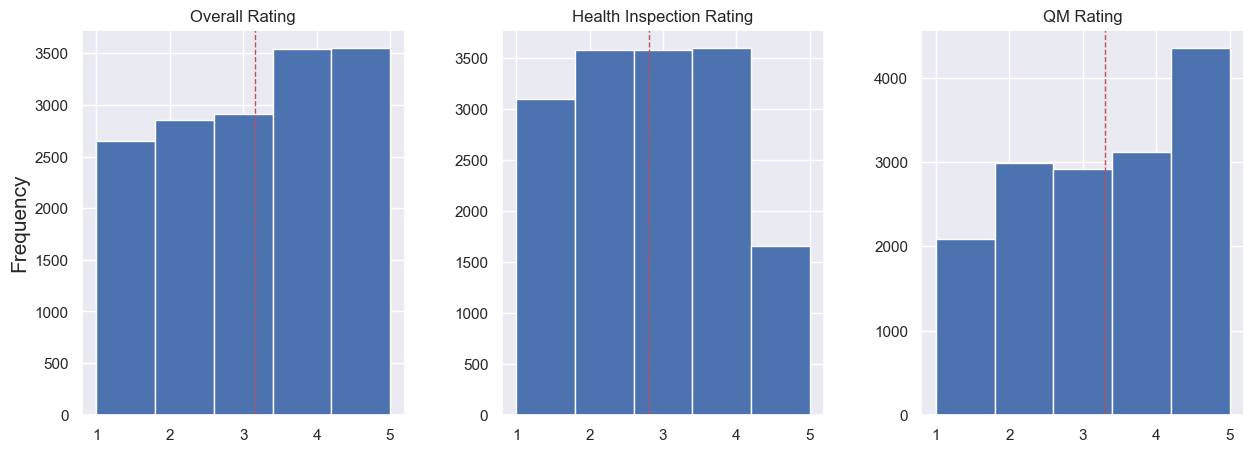

In [37]:
# Let's take a look at the initial distribution of overall rating across all nursing home facilities.
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

df.hist('Overall Rating', ax=axes[0], bins=5)
df.hist('Health Inspection Rating', ax=axes[1], bins=5)
df.hist('QM Rating', ax=axes[2], bins=5)
_ = axes[0].axvline(df['Overall Rating'].mean(), color='r', linestyle='dashed', linewidth=1)
_ = axes[1].axvline(df['Health Inspection Rating'].mean(), color='r', linestyle='dashed', linewidth=1)
_ = axes[2].axvline(df['QM Rating'].mean(), color='r', linestyle='dashed', linewidth=1)
_ = axes[0].set_ylabel('Frequency',fontsize=15)

<AxesSubplot:xlabel='Overall Rating', ylabel='Staffing Rating'>

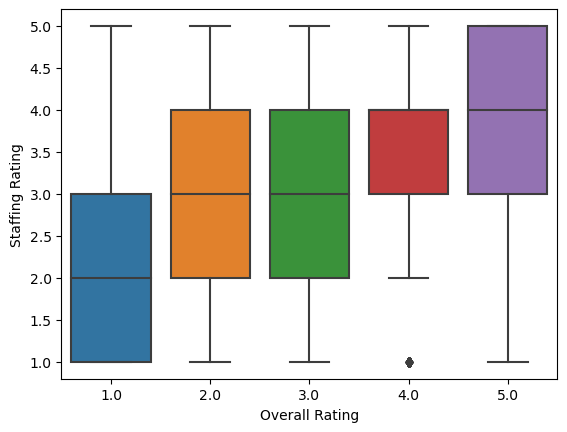

In [15]:
# Lets first explore the relationship between Overall Rating and Staffing Rating.

sns.boxplot(data=df, x='Overall Rating',y='Staffing Rating')

In [16]:
# Since the boxplot for the staffing rating of locations with an overall rating of 4.0 is missing the median indicator
# we should find out where the median lies.

staff_rate4 = df[df['Overall Rating']==4.0]['Staffing Rating']
# staff_rate4.median()
staff_rate4.median() == staff_rate4.quantile(0.75)

True

<AxesSubplot:xlabel='Overall Rating', ylabel='Reported RN Staffing Hours per Resident per Day'>

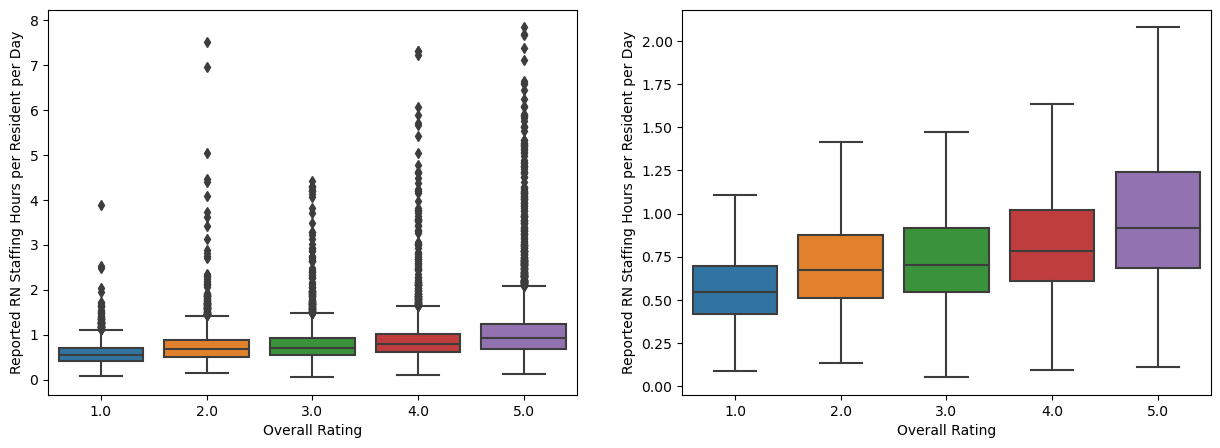

In [17]:
# lets then explore the relationship between reported RN staffing hours and Overall Rating.
# Here, we removed outliers to get a closer look at the differences between the plots.
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=False)

sns.boxplot(data=df, y='Reported RN Staffing Hours per Resident per Day',x='Overall Rating', showfliers = False, ax=axes[1])
sns.boxplot(data=df, y='Reported RN Staffing Hours per Resident per Day',x='Overall Rating', showfliers = True, ax=axes[0])

In [18]:
# Subset the existing dataframe such that non-numerical data columns are dropped to prepare for correlative analysis.
heatmap_df = df.iloc[:,4:]
heatmap_df.drop(columns=['Provider Type'],inplace=True)
heatmap_df.columns

Index(['Number of Certified Beds', 'Number of Residents in Certified Beds',
       'Overall Rating', 'Health Inspection Rating', 'QM Rating',
       'Staffing Rating', 'Reported CNA Staffing Hours per Resident per Day',
       'Reported LPN Staffing Hours per Resident per Day',
       'Reported RN Staffing Hours per Resident per Day',
       'Reported Licensed Staffing Hours per Resident per Day',
       'Reported Total Nurse Staffing Hours per Resident per Day',
       'Reported Physical Therapist Staffing Hours per Resident Per Day',
       'Adjusted CNA Staffing Hours per Resident per Day',
       'Adjusted LPN Staffing Hours per Resident per Day',
       'Adjusted RN Staffing Hours per Resident per Day',
       'Adjusted Total Nurse Staffing Hours per Resident per Day',
       'Number of Facility Reported Incidents',
       'Number of Substantiated Complaints', 'Number of Fines',
       'Total Amount of Fines in Dollars', 'Number of Payment Denials',
       'Total Number of Penalti

In [19]:
heatmap_df.head()

,Number of Certified Beds,Number of Residents in Certified Beds,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating,Reported CNA Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Reported Licensed Staffing Hours per Resident per Day,...,Adjusted CNA Staffing Hours per Resident per Day,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day,Adjusted Total Nurse Staffing Hours per Resident per Day,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties
0,124,102,4.0,3.0,3.0,4.0,2.12941,0.74412,0.65637,1.40049,...,2.25231,1.08972,0.58208,3.81554,0,1,1,6692.0,0,1
1,183,168,1.0,1.0,4.0,3.0,1.56042,0.87202,0.81488,1.68690,...,1.68142,1.13755,0.56660,3.28225,0,3,1,6045.0,0,1
2,77,77,5.0,4.0,5.0,4.0,2.20909,0.76429,0.65974,1.42403,...,2.22270,0.99036,0.57752,3.72376,0,0,0,0.0,0,0
3,107,96,4.0,3.0,2.0,5.0,1.94792,1.36927,2.19323,3.56250,...,1.91886,1.89421,1.78070,5.53756,0,3,1,189763.0,0,1
4,88,81,4.0,4.0,4.0,4.0,3.06111,1.06852,0.51420,1.58272,...,3.28563,1.55005,0.49372,5.14766,0,0,0,0.0,0,0


In [20]:
heatmap_df.index

RangeIndex(start=0, stop=15640, step=1)

Text(0.5, 1.0, 'Feature Correlative Relationships')

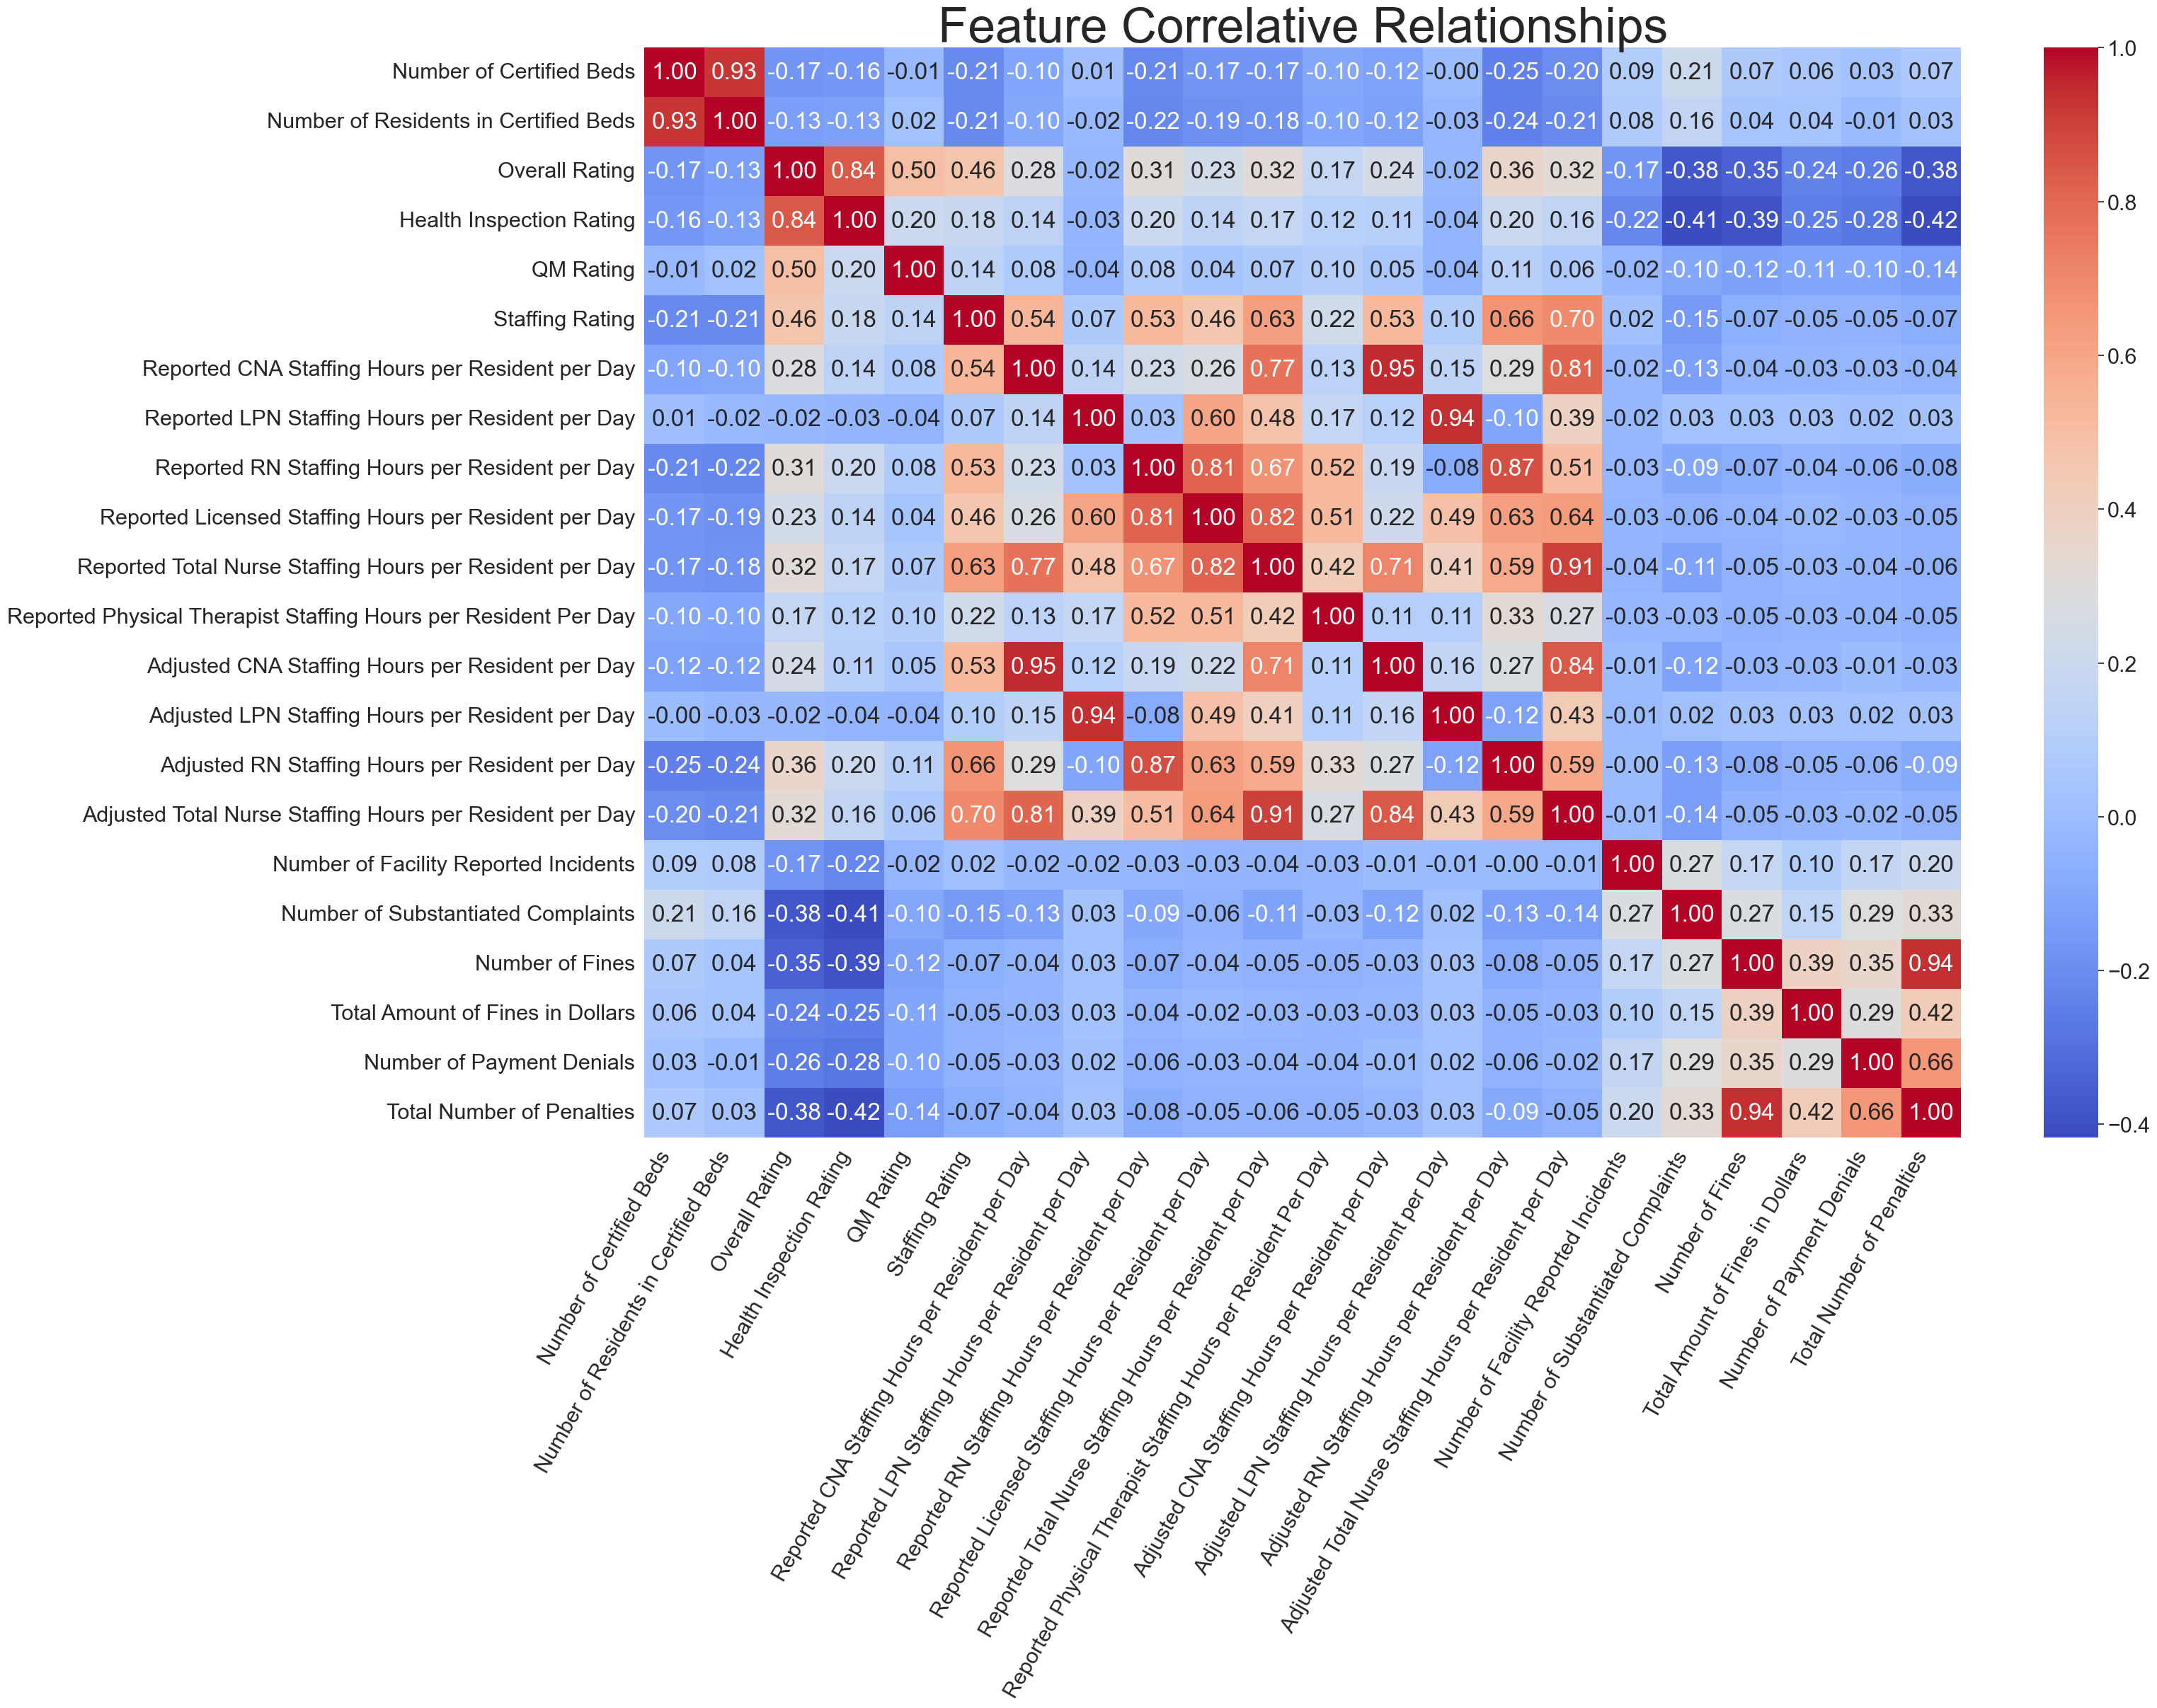

In [21]:
# Generate a heatmap of the dataframe so that we can get a sense of the correlative relationships between variables.
sns.set(font_scale=2.0)
df_corr = heatmap_df.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(df_corr,cmap="coolwarm", annot=True, fmt=".2f")
plt.xticks(rotation=60, ha='right') 
plt.title('Feature Correlative Relationships', fontsize=50)

### **Notable variable relationships:**

**Positive Relationships**
- Health inspection rating / Overall Rating: *0.84*
- Adjusted Total Nurse Staffing Hours per Resident per Day / Staffing Rating: *0.7*
- Adjusted RN Staffing Hours per Resident per Day / Staffing Rating: *0.66*
- Reported Total Nurse Staffing Hours per Resident per Day / Staffing Rating: *0.63*
- Reported CNA Staffing Hours per Resident per Day / Staffing Rating: *0.54*
- Adjusted CNA Staffing Hours per Resident per Day / Staffing Rating: *0.53*
- Reported RN Staffing Hours per Resident per Day / Staffing Rating: *0.53*
- Overall Rating / QM Rating: *0.5*
- Overall Rating / Staffing Rating: *0.46*

**Negative Relationships**
- Health Inspection Rating / Total Number of Penalties: *-0.42*
- Health Inspection Rating / Number of Substantiated Complaints: *-0.41*
- Health Inspection Rating / Number of Fines: *-0.39*
- Overall Rating / Total Number of Penalties: *-0.38*
- Overall Rating / Number of Substantiated Complaints: *-0.38*
- Overall Rating / Number of Fines: *-0.35*

## Visualizing Notable Feature Relationships:

### Positive Relationships: 

#### Health Inspection Rating vs. Overall Rating

<AxesSubplot:xlabel='Overall Rating', ylabel='Health Inspection Rating'>

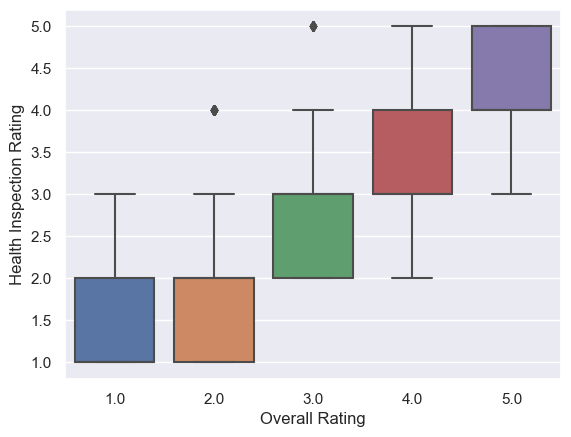

In [22]:
sns.set(font_scale=1.0)
sns.boxplot(data=df, x='Overall Rating',y='Health Inspection Rating')

<AxesSubplot:xlabel='Overall Rating', ylabel='Health Inspection Rating'>

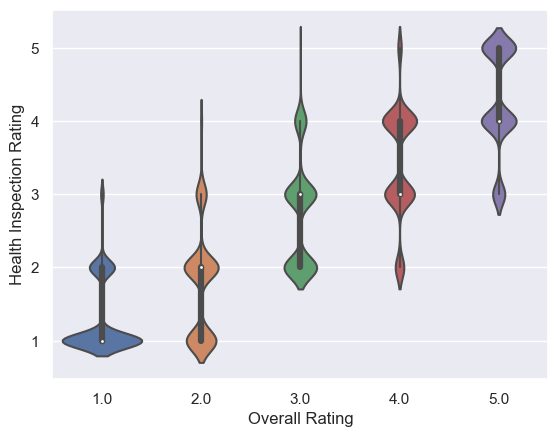

In [23]:
# Since the boxplot above does not give us a lot of information about the proportions of each score category
# we will plot it on a violin plot.

sns.violinplot(data=df, x='Overall Rating',y='Health Inspection Rating')

In [24]:
def count_by_score(score, column):
    counts = df[df['Overall Rating'] == score][column].value_counts(1)
    
    return counts

In [25]:
count1= [[j,k] for j,k in count_by_score(1,'Health Inspection Rating').items()]
count2= [[j,k] for j,k in count_by_score(2,'Health Inspection Rating').items()]
count3= [[j,k] for j,k in count_by_score(3,'Health Inspection Rating').items()]
count4= [[j,k] for j,k in count_by_score(4,'Health Inspection Rating').items()]
count5= [[j,k] for j,k in count_by_score(5,'Health Inspection Rating').items()]

In [26]:
count1.append([4.0,0.0])
count1.append([5.0,0.0])
count2.append([5.0,0.0])
count3.append([1.0,0.0])
count4.append([1.0,0.0])
count5.append([1.0,0.0])
count5.append([2.0,0.0])

count2.sort()
count3.sort()
count4.sort()
count5.sort()

In [27]:
count1 = [count1[i][1] for i in range(len(count1))]
count2 = [count2[i][1] for i in range(len(count2))]
count3 = [count3[i][1] for i in range(len(count3))]
count4 = [count4[i][1] for i in range(len(count4))]
count5 = [count5[i][1] for i in range(len(count5))]


Since the two categories that we are plotting are two discrete variables it is difficult to tell distributions of each rating group. we will create a stacked bar chart to visualize the proportions. This way we can get a better idea of what proportion of each overall rating has what portion of health inspection rating. 


In [28]:
x = ['HI Score 1','HI Score 2','HI Score 3','HI Score 4','HI Score 5']
labels = [1,2,3,4,5]

counts_df = pd.DataFrame([count1,count2,count3,count4,count5], columns=x)
counts_df['Overall Rating Score'] = labels


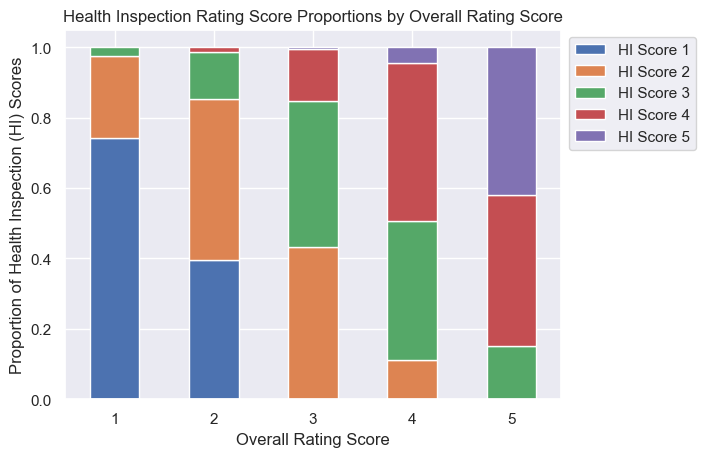

In [29]:
# plotting the stacked bar chart to help us visualize the proportions of each score category.
xticks = [1,2,3,4,5]
_ = counts_df.plot(x='Overall Rating Score', kind='bar',stacked=True)
_ = plt.legend(bbox_to_anchor=(1.0, 1.0))
_ = plt.title('Health Inspection Rating Score Proportions by Overall Rating Score')
_ = plt.ylabel('Proportion of Health Inspection (HI) Scores')
_ = plt.xticks(rotation=0)
plt.show()

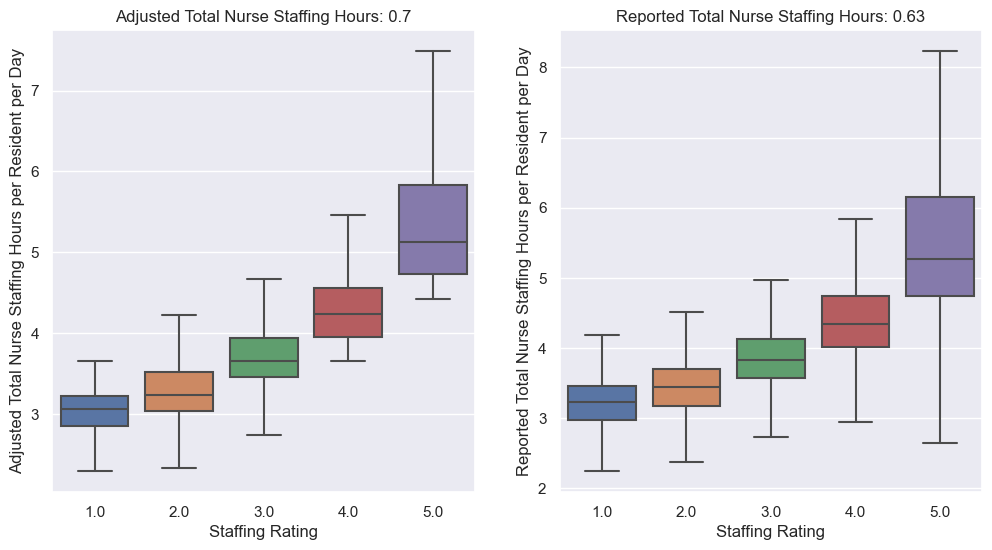

In [30]:
fig, axes = plt.subplots(1,2,sharex=True, figsize=(12, 6))
fig1 = sns.boxplot(data=df, x='Staffing Rating',y='Adjusted Total Nurse Staffing Hours per Resident per Day', showfliers=False, ax=axes[0])
fig2 = sns.boxplot(data=df, x='Staffing Rating',y='Reported Total Nurse Staffing Hours per Resident per Day', showfliers=False, ax=axes[1])
fig1.title.set_text('Adjusted Total Nurse Staffing Hours: 0.7')
fig2.title.set_text('Reported Total Nurse Staffing Hours: 0.63')
plt.show()

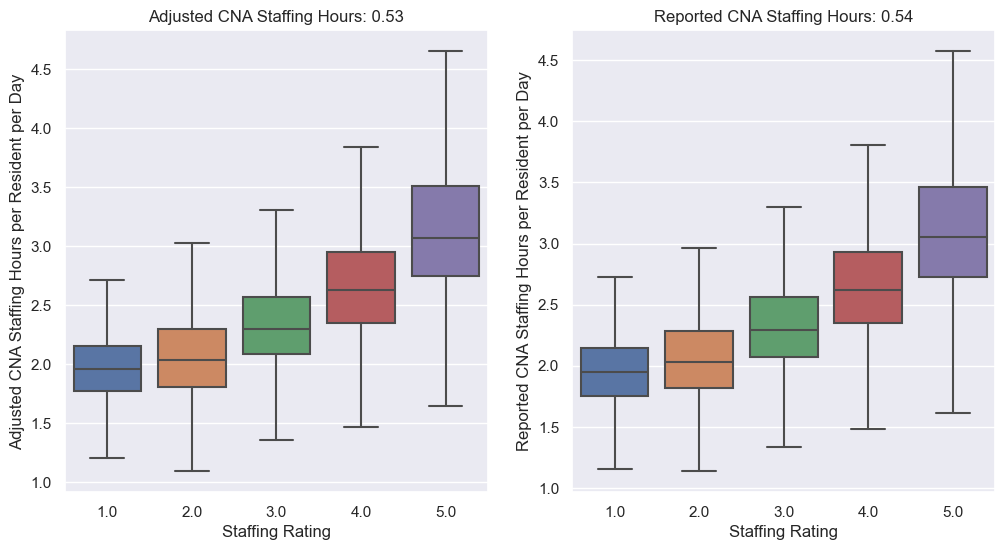

In [38]:
fig, axes = plt.subplots(1,2,sharex=True, figsize=(12, 6))
fig1 = sns.boxplot(data=df, x='Staffing Rating',y='Adjusted CNA Staffing Hours per Resident per Day', showfliers=False, ax=axes[0])
fig2 = sns.boxplot(data=df, x='Staffing Rating',y='Reported CNA Staffing Hours per Resident per Day', showfliers=False, ax=axes[1])
fig1.title.set_text('Adjusted CNA Staffing Hours: 0.53')
fig2.title.set_text('Reported CNA Staffing Hours: 0.54')
plt.show()

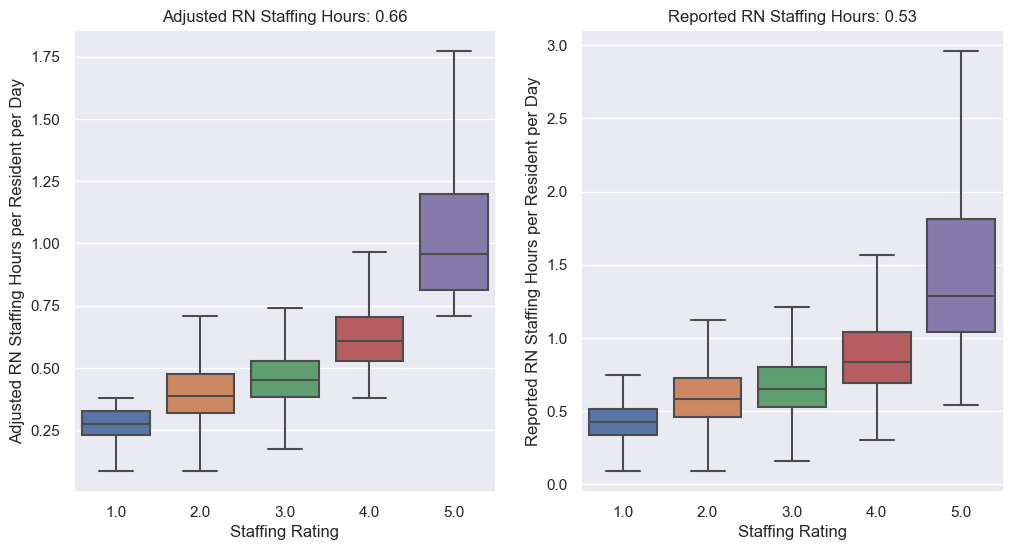

In [39]:
fig, axes = plt.subplots(1,2,sharex=True, figsize=(12, 6))
fig1 = sns.boxplot(data=df, x='Staffing Rating',y='Adjusted RN Staffing Hours per Resident per Day', showfliers=False, ax=axes[0])
fig2 = sns.boxplot(data=df, x='Staffing Rating',y='Reported RN Staffing Hours per Resident per Day', showfliers=False, ax=axes[1])
fig1.title.set_text('Adjusted RN Staffing Hours: 0.66')
fig2.title.set_text('Reported RN Staffing Hours: 0.53')
plt.show()

### Negative Relationships:

#### Health Inspection Rating vs. Total Number of Penalties / Substantiated Complaints / Fines:

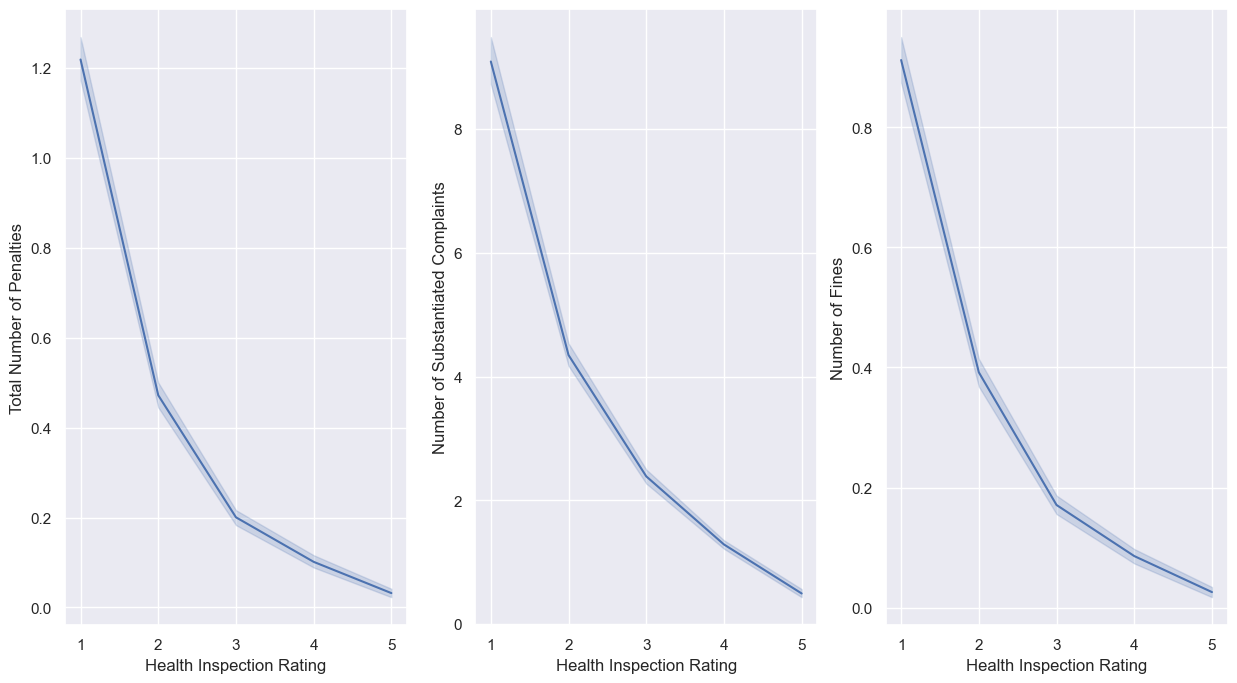

In [31]:
fig, axes = plt.subplots(1,3, sharex=True,figsize=(15,8))
fig1 = sns.lineplot(x='Health Inspection Rating',y='Total Number of Penalties',data=df, ax=axes[0])
fig2 = sns.lineplot(data=df,x='Health Inspection Rating',y='Number of Substantiated Complaints', ax=axes[1])
fig3 = sns.lineplot(data=df,x='Health Inspection Rating',y='Number of Fines', ax=axes[2])

#### Overall Rating vs. Total Number of Penalties / Substantiated Complaints / Fines:

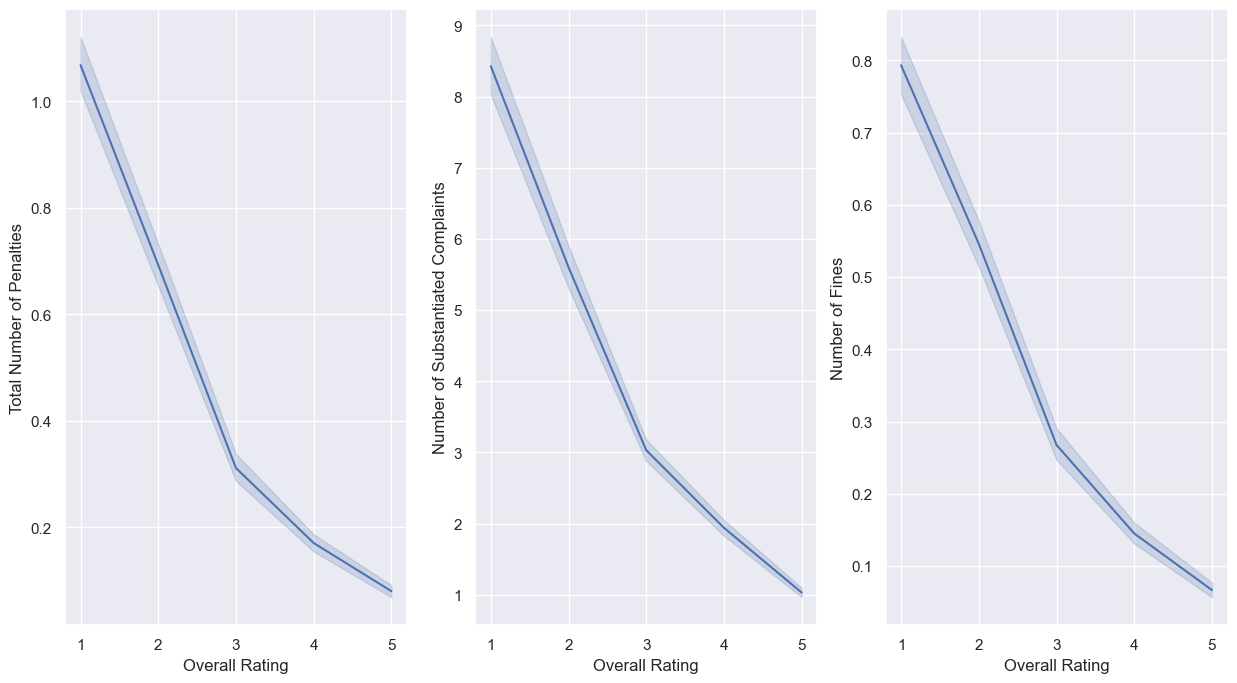

In [32]:
fig, axes = plt.subplots(1,3, sharex=True,figsize=(15,8))
fig1 = sns.lineplot(x='Overall Rating',y='Total Number of Penalties',data=df, ax=axes[0])
fig2 = sns.lineplot(data=df,x='Overall Rating',y='Number of Substantiated Complaints', ax=axes[1])
fig3 = sns.lineplot(data=df,x='Overall Rating',y='Number of Fines', ax=axes[2])
plt.show()

## Early Conclusions:

From what we could see from our exploratory data analysis, overall rating was strongly positively correlated with health inspection score and moderately positively correlated with the other two overarching quality metrics, QM rating and staffing rating. QM rating being a score given to the nursing homes based on quality measure scores. Staffing rating is a score given to the nursing home based on the staffing levels of the facility.

Since our original project proposal was focused on the staffing aspect of the nursing homes, that was our immediate focus. Upon investigating the staffing rating score, 3 different staff metrics stood out in terms of their correlative relationship with the staffing rating. These three were total nurse staffing hours, followed by specifically nurse and certified nursing assistant (CNA) staffing hours. As expected, the total nurse staffing hours had the strongest positive correlative effect on the staffing rating, however it was clear that registered nurses and CNAs had the strongest effect on staffing rating scores when compared to other roles such as LPNs and physical therapists.

As for the health inspection metric, I noticed that aside from the obvious strong positive correlation with overall rating, the health inspection metric had moderate negative correlative relationships with the number of penalties, substantiated complaints, and fines. As expected these relationships carried over to overall rating as well.